In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumMyeongjoOTF')
print(plt.rcParams['font.family'])

plt.rc('font', family='NanumMyeongjo') # For Windows
print(plt.rcParams['font.family'])

['NanumMyeongjoOTF']
['NanumMyeongjo']


In [4]:
!pip install openpyxl

In [5]:
import pandas as pd
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

file_path = '/content/drive/MyDrive/health_info.csv'
df = pd.read_csv('/content/drive/MyDrive/health_info.csv', encoding='cp949')

In [6]:
df['AGE_GROUP'] = (df['AGE_GROUP'] * 5)
print(df)

        HCHK_YEAR   IDV_ID  SIDO  SEX  AGE_GROUP  HEIGHT  WEIGHT  WAIST  \
0            2021  2551207    41    2         60     160      60   79.0   
1            2021  4030716    41    2         55     160      60   74.0   
2            2021  3297511    41    2         45     150      60   72.0   
3            2021  1638533    41    2         80     150      60   86.0   
4            2021   456602    41    2         65     155      60   66.0   
...           ...      ...   ...  ...        ...     ...     ...    ...   
999995       2021  4447892    11    2         70     150      60   91.0   
999996       2021  2763417    47    1         45     170     100   99.0   
999997       2021   572436    47    2         50     150      75   98.0   
999998       2021   541281    11    2         50     160      55   70.0   
999999       2021  4171104    11    1         70     160      65   95.0   

        SIGHT_LEFT  SIGHT_RIGHT  ...  GAMMA_GTP  SMK_STAT_TYPE_CD  DRK_YN  \
0              0.0    

In [7]:
df = df.groupby('AGE_GROUP').mean().round(2)
df = df.reset_index()
print(df)

   AGE_GROUP  HCHK_YEAR      IDV_ID   SIDO   SEX  HEIGHT  WEIGHT  WAIST  \
0         45     2021.0  2496504.32  33.84  1.45  165.61   67.31  81.47   
1         50     2021.0  2502396.20  34.18  1.46  164.19   65.79  81.20   
2         55     2021.0  2504464.20  34.05  1.50  162.32   64.05  81.21   
3         60     2021.0  2498316.59  34.23  1.50  160.81   62.68  81.66   
4         65     2021.0  2497027.93  33.91  1.53  159.26   61.49  82.30   
5         70     2021.0  2500850.76  33.55  1.52  157.94   60.77  83.30   
6         75     2021.0  2495920.39  33.68  1.53  156.47   59.65  84.16   
7         80     2021.0  2505429.70  33.93  1.54  155.05   58.17  84.40   
8         85     2021.0  2509146.08  35.22  1.55  153.50   56.13  84.29   
9         90     2021.0  2497077.61  36.85  1.62  150.57   51.69  82.34   

   SIGHT_LEFT  SIGHT_RIGHT  ...  SGPT_ALT  GAMMA_GTP  SMK_STAT_TYPE_CD  \
0        0.69         0.69  ...     28.55      39.54              1.68   
1        0.61         0.61

<ipython-input-7-e48b5843c24d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('AGE_GROUP').mean().round(2)


In [8]:
df = df[['AGE_GROUP', 'HEIGHT', 'WEIGHT', 'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT', 'BLDS', 'HMG']]

print(df)

   AGE_GROUP  HEIGHT  WEIGHT  WAIST  SIGHT_LEFT  SIGHT_RIGHT  HEAR_LEFT  \
0         45  165.61   67.31  81.47        0.69         0.69       1.01   
1         50  164.19   65.79  81.20        0.61         0.61       1.01   
2         55  162.32   64.05  81.21        0.55         0.55       1.02   
3         60  160.81   62.68  81.66        0.50         0.50       1.03   
4         65  159.26   61.49  82.30        0.40         0.40       1.05   
5         70  157.94   60.77  83.30        0.31         0.31       1.07   
6         75  156.47   59.65  84.16        0.26         0.26       1.12   
7         80  155.05   58.17  84.40        0.23         0.24       1.18   
8         85  153.50   56.13  84.29        0.24         0.26       1.24   
9         90  150.57   51.69  82.34        0.31         0.29       1.34   

   HEAR_RIGHT    BLDS    HMG  
0        1.01   98.87  13.90  
1        1.01  101.15  13.81  
2        1.02  103.15  13.86  
3        1.03  105.36  13.86  
4        1.05  106.

In [9]:
df = df.rename(columns={
    'AGE_GROUP' : '나이',
    'HEIGHT' : '키',
    'WEIGHT' : '몸무게',
    'WAIST' : '허리 둘레',
    'SIGHT_LEFT' : '시력(좌)',
    'SIGHT_RIGHT' : '시력(우)',
    'HEAR_LEFT' : '청력(좌)',
    'HEAR_RIGHT' : '청력(우)',
    'BLDS' : '공복 혈당',
    'HMG' : '혈색소'
})

print(df)

   나이       키    몸무게  허리 둘레  시력(좌)  시력(우)  청력(좌)  청력(우)   공복 혈당    혈색소
0  45  165.61  67.31  81.47   0.69   0.69   1.01   1.01   98.87  13.90
1  50  164.19  65.79  81.20   0.61   0.61   1.01   1.01  101.15  13.81
2  55  162.32  64.05  81.21   0.55   0.55   1.02   1.02  103.15  13.86
3  60  160.81  62.68  81.66   0.50   0.50   1.03   1.03  105.36  13.86
4  65  159.26  61.49  82.30   0.40   0.40   1.05   1.05  106.25  13.73
5  70  157.94  60.77  83.30   0.31   0.31   1.07   1.07  107.10  13.59
6  75  156.47  59.65  84.16   0.26   0.26   1.12   1.12  108.13  13.36
7  80  155.05  58.17  84.40   0.23   0.24   1.18   1.17  108.66  13.06
8  85  153.50  56.13  84.29   0.24   0.26   1.24   1.24  108.44  12.73
9  90  150.57  51.69  82.34   0.31   0.29   1.34   1.33  107.29  12.15


In [10]:
df['청력(좌)'] = df['청력(좌)'].replace({1: '정상', 2: '비정상'})
df['청력(우)'] = df['청력(우)'].replace({1: '정상', 2: '비정상'})

print(df)

   나이       키    몸무게  허리 둘레  시력(좌)  시력(우)  청력(좌)  청력(우)   공복 혈당    혈색소
0  45  165.61  67.31  81.47   0.69   0.69   1.01   1.01   98.87  13.90
1  50  164.19  65.79  81.20   0.61   0.61   1.01   1.01  101.15  13.81
2  55  162.32  64.05  81.21   0.55   0.55   1.02   1.02  103.15  13.86
3  60  160.81  62.68  81.66   0.50   0.50   1.03   1.03  105.36  13.86
4  65  159.26  61.49  82.30   0.40   0.40   1.05   1.05  106.25  13.73
5  70  157.94  60.77  83.30   0.31   0.31   1.07   1.07  107.10  13.59
6  75  156.47  59.65  84.16   0.26   0.26   1.12   1.12  108.13  13.36
7  80  155.05  58.17  84.40   0.23   0.24   1.18   1.17  108.66  13.06
8  85  153.50  56.13  84.29   0.24   0.26   1.24   1.24  108.44  12.73
9  90  150.57  51.69  82.34   0.31   0.29   1.34   1.33  107.29  12.15


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


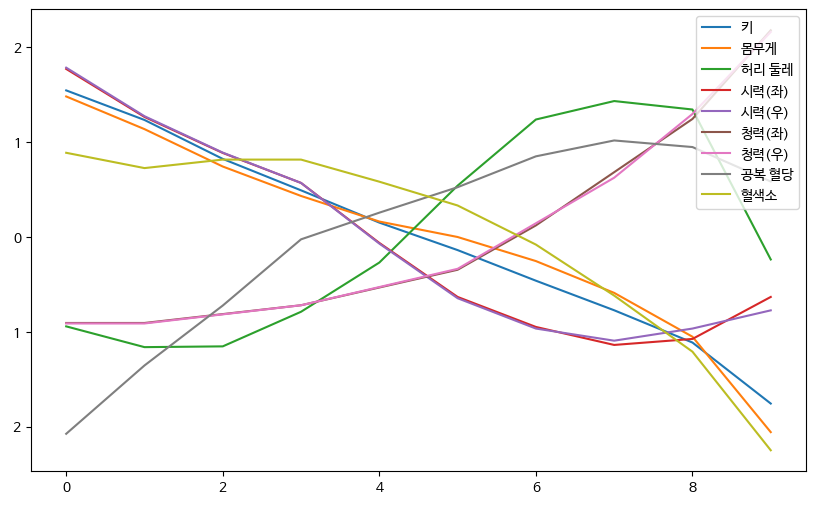

In [11]:
from sklearn.preprocessing import StandardScaler

df_without_age = df.drop(columns=['나이'])

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_without_age), columns=df_without_age.columns)

plt.figure(figsize=(10, 6))

for column in df_scaled.columns:
    plt.plot(df_scaled.index, df_scaled[column], label=column)

plt.legend()
plt.show()

In [ ]:
df = df[['나이', '키', '몸무게', '허리 둘레', '공복 혈당', '혈색']]

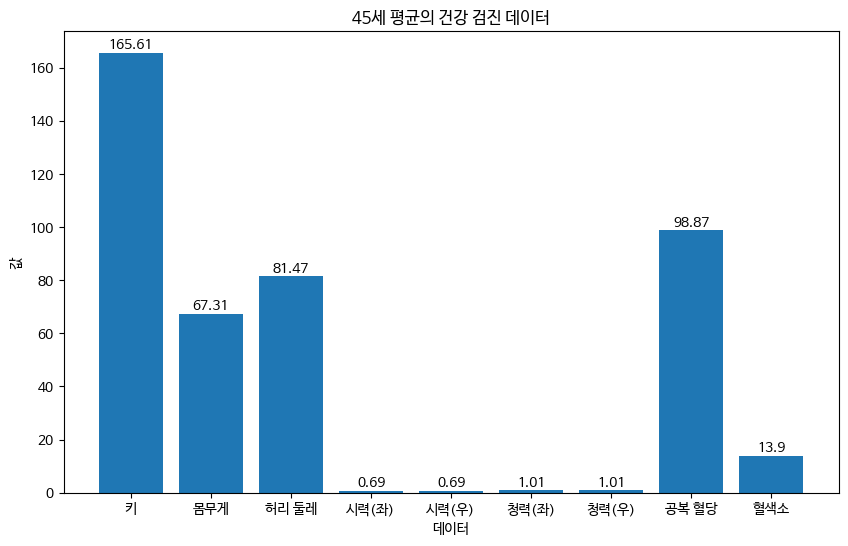

In [15]:
data_45 = df[df['나이'] == 45]

data = data_45.loc[:, data_45.columns != '나이']

plt.figure(figsize=(10, 6))
bars = plt.bar(data.columns, data.iloc[0].values)
plt.xlabel('데이터')
plt.ylabel('값')
plt.title('45세 평균의 건강 검진 데이터')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


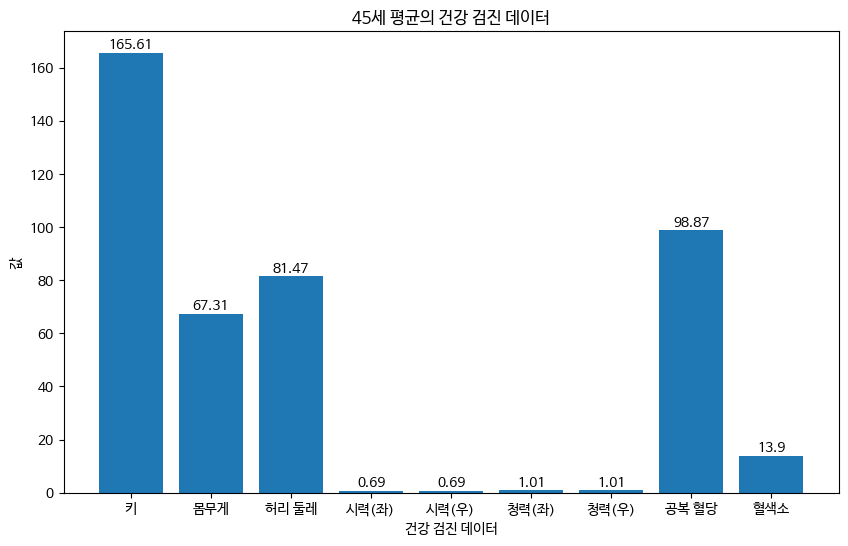

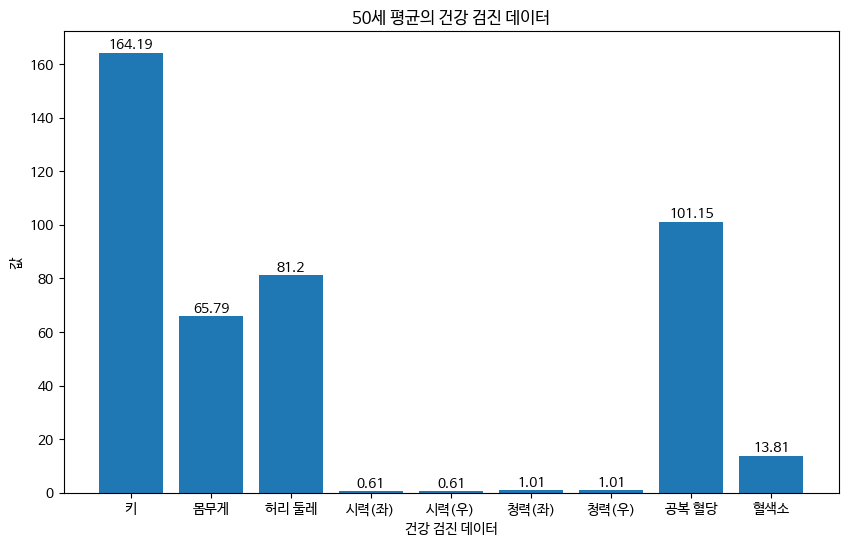

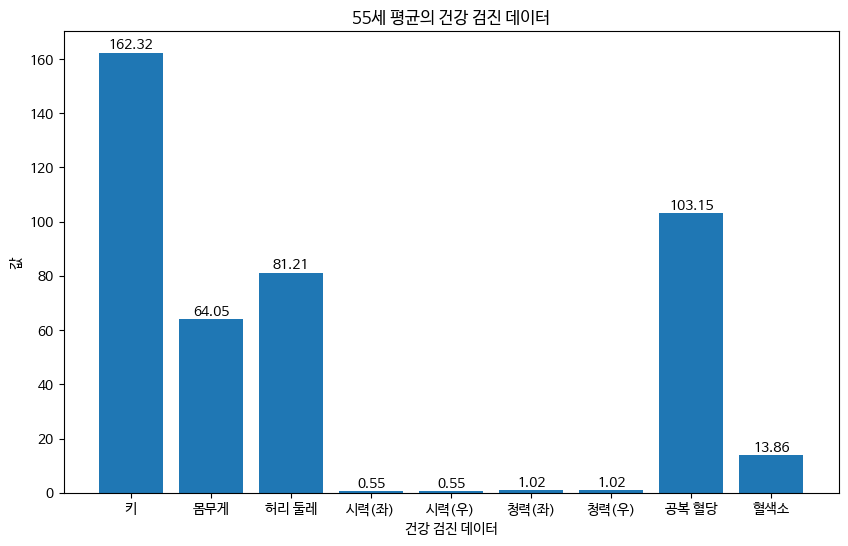

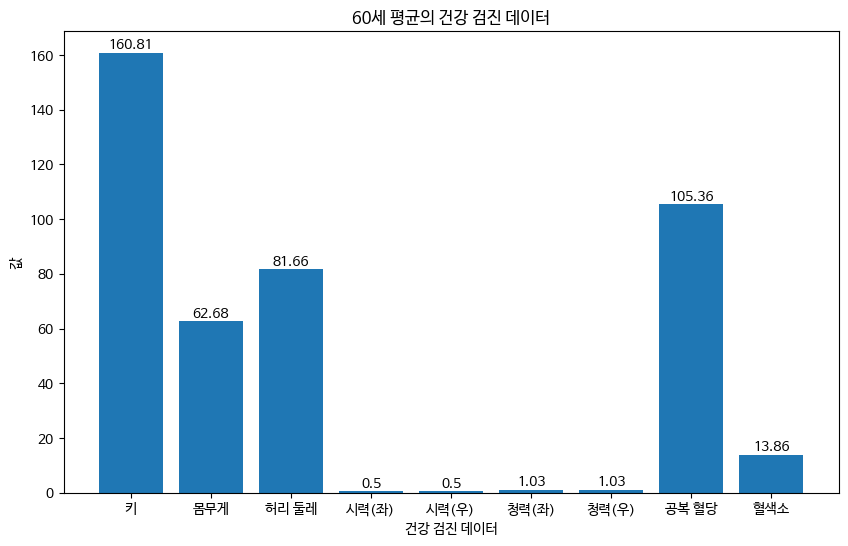

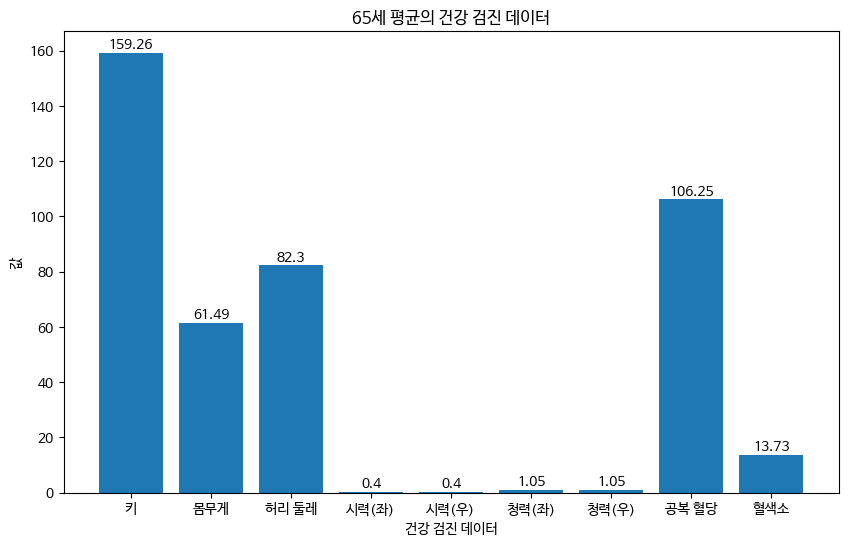

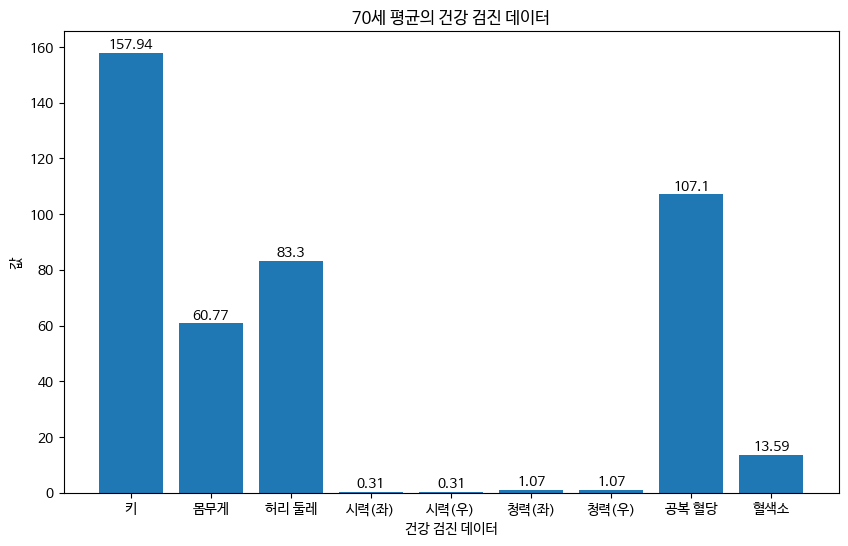

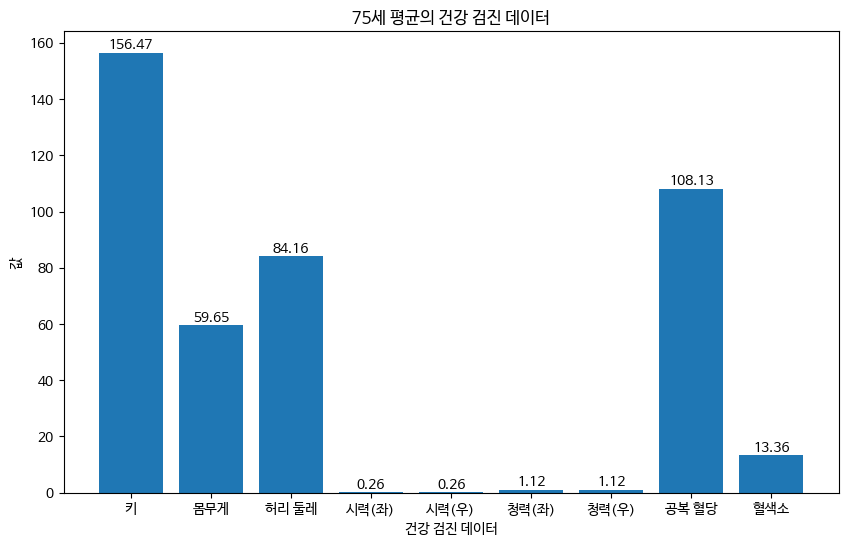

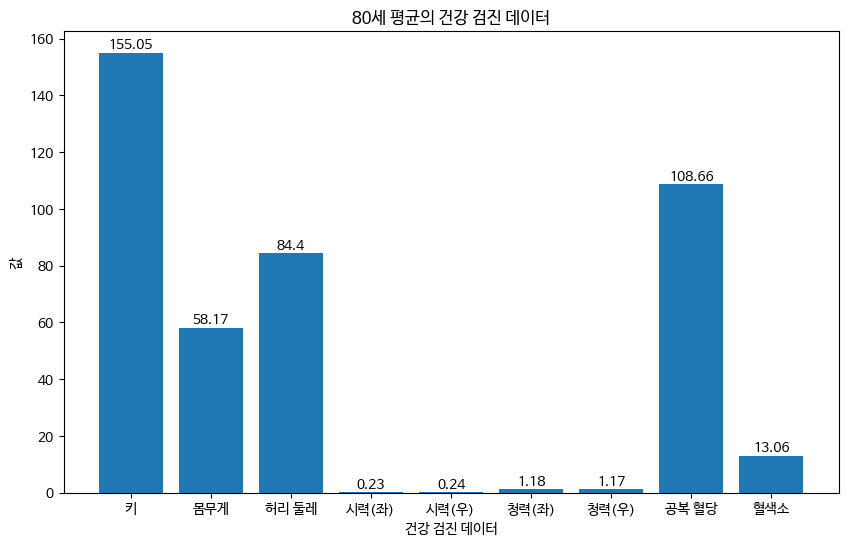

In [19]:
for age in range(45, 81, 5):
    data_age = df[df['나이'] == age]

    data = data_age.loc[:, data_age.columns != '나이']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(data.columns, data.mean().values)
    plt.xlabel('건강 검진 데이터')
    plt.ylabel('값')
    plt.title(f'{age}세 평균의 건강 검진 데이터')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.show()
